In [13]:
import numpy as np
import pandas as pd


np.random.seed(50)
sample_no = 500

# Use the normal distribution (mean, standard deviation)
credit_scores = np.random.normal(700, 50, sample_no).astype(int)
loan_amounts = np.random.normal(15000, 5000, sample_no).astype(int)
loan_statuses = np.where((credit_scores >= 650) & (loan_amounts < 12000), 'Good', 'Bad')


loan_applications = pd.DataFrame({
    'Loan Amount (Euros)': loan_amounts,
    'Credit Score': credit_scores,
    'Loan Status': loan_statuses
})

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# set the independent variables X and dependent variable y
X = loan_applications[['Loan Amount (Euros)', 'Credit Score']]
y = loan_applications['Loan Status']

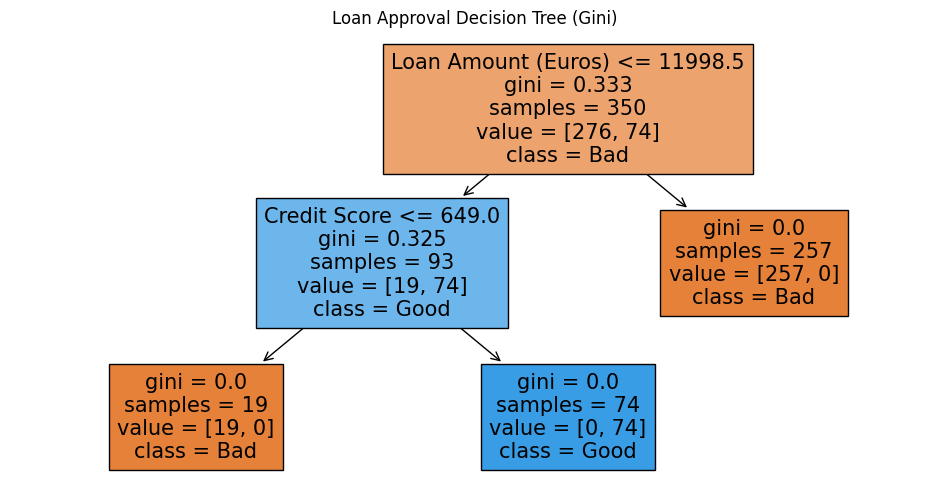

In [15]:
# encode the dependent variable (e.g., 'Good' as 1 and 'Bad' as 0)
y_encoded = np.where(y == 'Good', 1, 0)

# Split the data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3)

# Create the decision tree classifier with pre-pruning parameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=10)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Bad', 'Good'], filled=True)
plt.title("Loan Approval Decision Tree (Gini)")
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Evaluate performace
train_pred = clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.2f}")

# Test accuracy
test_pred = clf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.2f}")


Training Accuracy: 1.00
Test Accuracy: 1.00


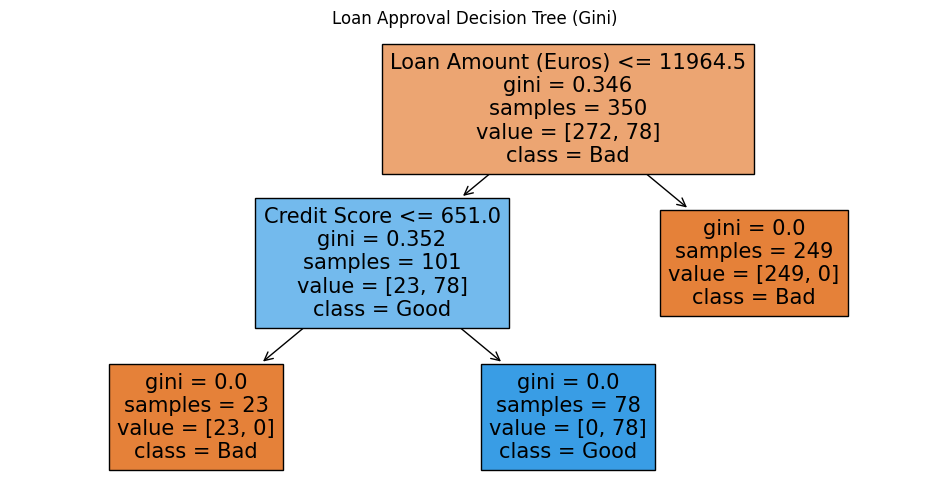

In [21]:
y_encoded = np.where(y == 'Good', 1, 0)

# Split the data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3)

# Without the constraints
clf = DecisionTreeClassifier(criterion='gini', max_depth=None)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Bad', 'Good'], filled=True)
plt.title("Loan Approval Decision Tree (Gini)")
plt.show()

In [22]:
# Evaluate performace
train_pred = clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.2f}")

# Test accuracy
test_pred = clf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.99
